In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
df = pd.read_csv('churn_rate_prediction.csv')
df

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


In [2]:
unique_values = df['churn_risk_score'].unique()
print(unique_values)

[ 2  1  5  3  4 -1]


In [3]:
df.drop(["customer_id", "security_no", "Name", ], axis=1, inplace=True)
df

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Wi-Fi,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,29,F,Town,Basic Membership,2016-06-27,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,23,F,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,53,M,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


In [4]:

df.iloc[:,0:10]

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option
0,18,F,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi
1,32,F,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data
2,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi
3,37,M,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data
4,31,F,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data
...,...,...,...,...,...,...,...,...,...,...
36987,46,F,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Wi-Fi
36988,29,F,Town,Basic Membership,2016-06-27,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi
36989,23,F,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,Desktop,Wi-Fi
36990,53,M,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Mobile_Data


In [5]:
df.iloc[:,11:22]

,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,17,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,16,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,14,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,11,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,20,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...
36987,2,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,13,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,12,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,15,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


In [6]:
df.loc[df['joined_through_referral'] == '?']

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
1,32,F,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
7,42,M,NaN,No Membership,2016-07-12,?,CID56614,Credit/Debit Card Offers,Both,Fiber_Optic,...,429.110000,44554.82,24.0,568.080000,No,Yes,Yes,Unsolved,Poor Product Quality,5
15,16,F,Town,Basic Membership,2017-07-09,?,CID35062,Credit/Debit Card Offers,Smartphone,Fiber_Optic,...,30.140000,18792.31,7.0,141.513201,Yes,No,Yes,Unsolved,Too many ads,5
28,61,F,Village,Silver Membership,2017-05-14,?,CID29752,Gift Vouchers/Coupons,?,Fiber_Optic,...,-936.744818,29156.10,10.0,710.380000,Yes,No,Yes,No Information Available,No reason specified,4
30,17,F,City,No Membership,2015-11-25,?,CID40054,Without Offers,Desktop,Fiber_Optic,...,162.930000,31100.95,11.0,633.050000,No,Yes,Yes,Solved,Too many ads,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36934,62,F,City,Basic Membership,2015-04-10,?,CID50354,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,31.940000,41309.76,21.0,NaN,Yes,No,Yes,Unsolved,No reason specified,5
36944,42,M,Village,Silver Membership,2015-04-07,?,CID48061,Credit/Debit Card Offers,?,Fiber_Optic,...,294.400000,55351.33,19.0,1254.248143,Yes,Yes,No,Not Applicable,Reasonable Price,2
36956,26,F,Town,Silver Membership,2017-03-03,?,CID47305,Without Offers,Smartphone,Fiber_Optic,...,-746.034591,39720.55,21.0,683.630000,No,Yes,Yes,Unsolved,Poor Website,4
36971,42,F,Town,Premium Membership,2015-02-04,?,CID54811,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,34.100000,39439.10,Error,1224.393346,Yes,No,Yes,Solved in Follow-up,Too many ads,3


In [7]:
columns_with_question_mark = df.columns[df.isin(['?', 'Error']).any()]
print(columns_with_question_mark)

Index(['joined_through_referral', 'medium_of_operation',
       'avg_frequency_login_days'],
      dtype='object')


# Chỉnh sửa dữ liệu = '?' của cột 'joined_through_referral' 
 + Nếu referral_id != 'xxxxxxxx' thì joined_through_referral = Yes
 
 + Nếu referral_id == 'xxxxxxxx' thì joined_through_referral = No


In [8]:
df.loc[df['joined_through_referral'] == '?', 'joined_through_referral'] = df.loc[df['joined_through_referral'] == '?', 'referral_id'].apply(lambda x: 'No' if x == 'xxxxxxxx' else 'Yes')
df

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,Yes,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Wi-Fi,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,29,F,Town,Basic Membership,2016-06-27,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,23,F,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,53,M,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


# Xử lý medium_of_operation

In [9]:
# In ra các loại giá trị trong cột 'internet_option'
unique_values = df['internet_option'].unique()
print(unique_values)
unique_values1 = df['medium_of_operation'].unique()
print(unique_values1)

['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
['?' 'Desktop' 'Smartphone' 'Both']


In [10]:
df.loc[df['medium_of_operation']=='?']

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
5,13,M,City,Gold Membership,2016-01-08,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,433.62,13884.77,24.0,722.270000,Yes,No,Yes,Unsolved,No reason specified,3
9,45,F,Town,No Membership,2016-11-30,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,97.31,19244.16,28.0,706.230000,No,Yes,Yes,No Information Available,Poor Customer Service,4
14,40,M,City,Premium Membership,2016-11-19,No,xxxxxxxx,Without Offers,?,Fiber_Optic,...,100.59,14842.62,26.0,NaN,No,Yes,No,Not Applicable,Poor Website,3
16,57,F,City,No Membership,2016-01-27,No,xxxxxxxx,Without Offers,?,Wi-Fi,...,333.34,47241.32,8.0,NaN,Yes,Yes,Yes,Solved in Follow-up,Too many ads,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36959,61,M,Town,Silver Membership,2016-09-10,No,xxxxxxxx,Without Offers,?,Wi-Fi,...,103.28,26008.94,15.0,612.060000,Yes,No,No,Not Applicable,Poor Website,4
36960,40,F,Town,Basic Membership,2017-11-20,No,xxxxxxxx,Without Offers,?,Wi-Fi,...,96.33,16361.98,Error,954.137008,No,Yes,No,Not Applicable,Too many ads,4
36962,26,M,City,Gold Membership,2017-02-08,No,xxxxxxxx,Without Offers,?,Wi-Fi,...,202.95,10356.88,Error,693.380000,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,4
36978,57,M,NaN,Silver Membership,2016-01-10,Yes,CID57663,Without Offers,?,Wi-Fi,...,58.41,40795.52,14.0,605.820000,No,Yes,No,Not Applicable,Too many ads,4


In [11]:
# Thống kê crosstab giữa 'medium_of_operation' và 'internet_option'
crosstab_result = pd.crosstab(df['medium_of_operation'], df['internet_option'])
print(crosstab_result)

internet_option      Fiber_Optic  Mobile_Data  Wi-Fi
medium_of_operation                                 
?                           1741         1849   1803
Both                        1252         1262   1296
Desktop                     4572         4625   4716
Smartphone                  4671         4607   4598


Ta thấy giữa internet_option và medium_of_operation không thể hiện logic nào. Nên sử dụng phương pháp thay thế '?' bằng ngẫu nhiên 'Desktop', 'Both', 'Smartphone'theo tỷ lệ mà bộ dữ liệu đang có

In [12]:
# Tỉ lệ các giá trị thay thế
proportions = [1252, 4572, 4671]
values = ['Desktop', 'Both', 'Smartphone']

# Thay thế giá trị '?' bằng các giá trị ngẫu nhiên theo tỷ lệ
replacements = np.random.choice(values, size=df['medium_of_operation'].eq('?').sum(), p=proportions/np.sum(proportions))
df.loc[df['medium_of_operation'] == '?', 'medium_of_operation'] = replacements

In [13]:
# Thống kê crosstab giữa 'medium_of_operation' và 'internet_option'
crosstab_result = pd.crosstab(df['medium_of_operation'], df['internet_option'])
print(crosstab_result)

internet_option      Fiber_Optic  Mobile_Data  Wi-Fi
medium_of_operation                                 
Both                        1977         2060   2070
Desktop                     4780         4846   4925
Smartphone                  5479         5437   5418


Nhận xét: Dữ liệu vẫn giữ được tỷ lệ

# Xử lý dữ liệu số


# xử lý [df['avg_frequency_login_days']=='Error']

In [14]:
df.loc[df['avg_frequency_login_days']=='Error']

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
39,49,F,Village,Platinum Membership,2017-06-09,Yes,CID18445,Credit/Debit Card Offers,Both,Fiber_Optic,...,706.36,19062.25,Error,780.580000,Yes,No,No,Not Applicable,Poor Product Quality,3
44,36,M,Village,Silver Membership,2016-11-28,Yes,CID33962,Gift Vouchers/Coupons,Both,Mobile_Data,...,691.09,17989.46,Error,NaN,No,Yes,Yes,Solved,No reason specified,4
45,12,M,City,Premium Membership,2017-02-13,No,xxxxxxxx,Without Offers,Desktop,Mobile_Data,...,33.09,55607.35,Error,NaN,Yes,No,No,Not Applicable,User Friendly Website,1
48,30,M,City,Platinum Membership,2015-12-11,Yes,CID4129,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,100.42,86433.91,Error,719.930000,No,Yes,Yes,Unsolved,Reasonable Price,2
50,23,M,Village,Gold Membership,2015-10-22,Yes,CID24995,Without Offers,Smartphone,Wi-Fi,...,65.25,5136.08,Error,755.220000,No,Yes,No,Not Applicable,Poor Customer Service,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36960,40,F,Town,Basic Membership,2017-11-20,No,xxxxxxxx,Without Offers,Desktop,Wi-Fi,...,96.33,16361.98,Error,954.137008,No,Yes,No,Not Applicable,Too many ads,4
36962,26,M,City,Gold Membership,2017-02-08,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,...,202.95,10356.88,Error,693.380000,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,4
36971,42,F,Town,Premium Membership,2015-02-04,Yes,CID54811,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,34.10,39439.10,Error,1224.393346,Yes,No,Yes,Solved in Follow-up,Too many ads,3
36989,23,F,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,154.94,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4


In [15]:

df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace('Error', np.nan).astype(float)
df['avg_frequency_login_days'].describe()

count    33470.000000
mean        15.976715
std          9.215858
min        -43.652702
25%          9.000000
50%         16.000000
75%         23.000000
max         73.061995
Name: avg_frequency_login_days, dtype: float64

In [16]:
df.loc[df['avg_frequency_login_days'] < 0].iloc[:,11:22].head()


,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
157,5,32.29,63097.55,-12.714311,780.090000,No,Yes,No,Not Applicable,User Friendly Website,2
165,6,32.89,16340.59,-1.590067,NaN,Yes,No,Yes,Solved in Follow-up,Poor Website,3
181,14,32.16,67458.29,-13.646850,764.620000,Yes,No,Yes,Solved in Follow-up,User Friendly Website,2
309,20,260.92,70639.99,-5.339639,760.540000,No,Yes,No,Not Applicable,User Friendly Website,1
606,16,148.71,24703.93,-15.725901,331.099252,No,Yes,Yes,Solved,Too many ads,5


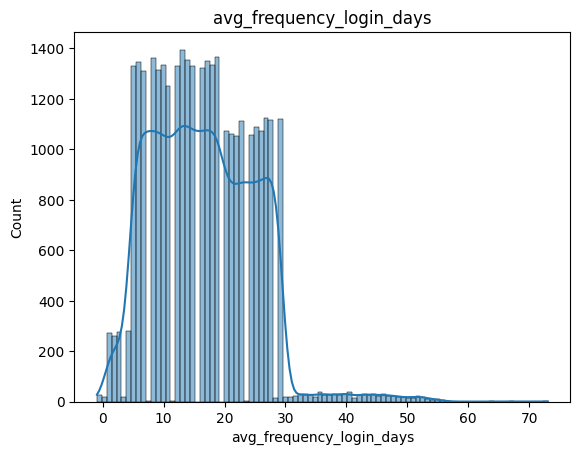

In [17]:
data = df.loc[df['avg_frequency_login_days'] > -1]['avg_frequency_login_days']
sns.histplot(data, kde=True)
plt.xlabel('avg_frequency_login_days')
plt.ylabel('Count')
plt.title('avg_frequency_login_days')
plt.show()

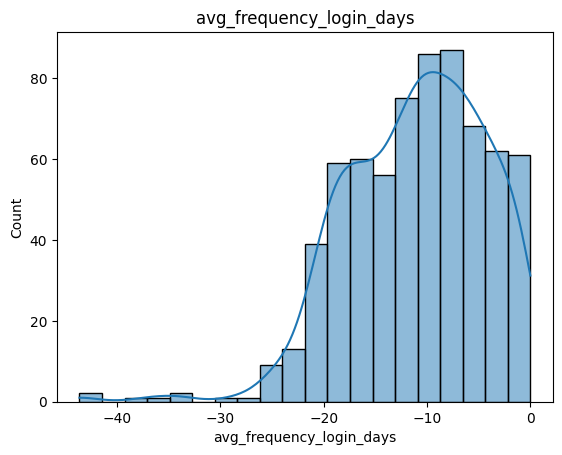

In [18]:
data = df.loc[df['avg_frequency_login_days'] <0]['avg_frequency_login_days']
sns.histplot(data, kde=True)
plt.xlabel('avg_frequency_login_days')
plt.ylabel('Count')
plt.title('avg_frequency_login_days')
plt.show()

In [19]:
median_value = df.loc[df['avg_frequency_login_days'] >= 0, 'avg_frequency_login_days'].median()
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].mask(df['avg_frequency_login_days'] < 0, median_value)
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].fillna(median_value)


In [20]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,16.477389,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,7.894634,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,0.009208,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,11.000000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,16.000000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000


Các điểm bất thường:

    1. Dữ liệu âm của các cột 'days_since_last_login', 'avg_time_spent','points_in_wallet'

Xử lý giá trị âm cột 'days_since_last_login'

In [21]:
df.loc[df['days_since_last_login'] < 0].iloc[:,0:12]

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login
15,16,F,Town,Basic Membership,2017-07-09,Yes,CID35062,Credit/Debit Card Offers,Smartphone,Fiber_Optic,13:48:22,-999
57,40,F,Town,Silver Membership,2017-08-21,Yes,CID15992,Credit/Debit Card Offers,Smartphone,Wi-Fi,02:12:51,-999
70,59,F,Town,No Membership,2017-06-08,Yes,CID8099,Gift Vouchers/Coupons,Desktop,Fiber_Optic,10:53:03,-999
74,53,M,City,No Membership,2017-04-06,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Wi-Fi,06:24:30,-999
113,14,M,Town,Basic Membership,2017-07-19,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Mobile_Data,15:34:53,-999
...,...,...,...,...,...,...,...,...,...,...,...,...
36891,58,F,Town,Gold Membership,2015-02-28,No,xxxxxxxx,Gift Vouchers/Coupons,Both,Fiber_Optic,21:03:18,-999
36921,35,F,Town,Premium Membership,2016-05-29,Yes,CID17527,Gift Vouchers/Coupons,Both,Mobile_Data,07:20:31,-999
36940,61,M,Town,Silver Membership,2015-06-25,No,xxxxxxxx,Without Offers,Desktop,Wi-Fi,09:48:58,-999
36953,55,F,Town,Silver Membership,2016-08-26,Yes,CID42430,Gift Vouchers/Coupons,Both,Wi-Fi,18:41:51,-999


In [22]:
df.loc[df['days_since_last_login'] < 0].iloc[:,11:22]


,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
15,-999,30.140000,18792.31,7.0,141.513201,Yes,No,Yes,Unsolved,Too many ads,5
57,-999,46.570000,24045.93,8.0,709.730000,No,Yes,No,Not Applicable,Poor Product Quality,3
70,-999,207.520000,12556.28,10.0,-44.597633,No,Yes,No,Not Applicable,No reason specified,4
74,-999,253.960000,19233.10,25.0,1032.199126,Yes,No,Yes,Solved,Poor Website,5
113,-999,1156.431904,32302.27,24.0,520.330000,No,Yes,No,Not Applicable,Poor Customer Service,5
...,...,...,...,...,...,...,...,...,...,...,...
36891,-999,453.830000,46845.97,16.0,NaN,No,Yes,Yes,Solved in Follow-up,No reason specified,3
36921,-999,283.760000,36063.43,13.0,1096.844798,Yes,No,No,Not Applicable,No reason specified,3
36940,-999,31.760000,27604.96,16.0,725.240000,Yes,No,Yes,Solved,Poor Customer Service,3
36953,-999,543.560000,10060.29,17.0,724.720000,Yes,Yes,No,Not Applicable,Reasonable Price,2


Xét trên tập dữ liệu 'days_since_last_login' = -999
        
         Ta có thể thấy giá trị -999 chiếm 1999 dòng, đồng thời ứng với mỗi dòng dữ liệu đều tồn tại giá trị tại các cột như 'last_visit_time','avg_time_spent',... Nên ta có thể khẳng định đây không phải giá trị đại diện cho việc khách hàng chưa đăng nhập lần nào. Mà có thể các giá trị này là các giá trị bị thiếu (missing values)

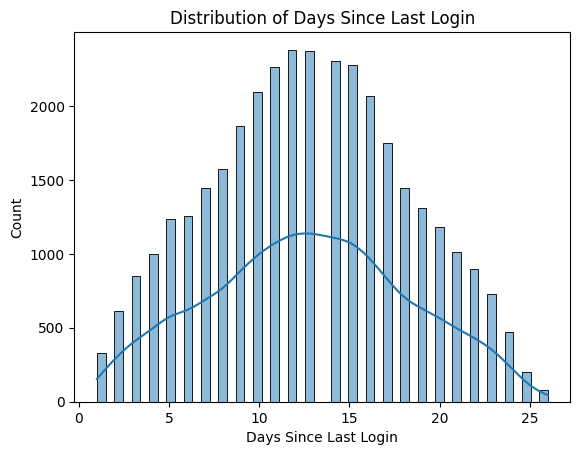

In [23]:


data = df.loc[df['days_since_last_login'] > -1]['days_since_last_login']
sns.histplot(data, kde=True)
plt.xlabel('Days Since Last Login')
plt.ylabel('Count')
plt.title('Distribution of Days Since Last Login')
plt.show()


Nhận xét: dữ liệu không có các giá trị ngoại lệ (outliers) và phân phối dữ liệu xấp xỉ đối xứng. 

==> Sử dụng giá trị mean() thay thế cho missing values

In [24]:
mean_value = df.loc[df['days_since_last_login'] > -1]['days_since_last_login'].mean()
df['days_since_last_login'] = df['days_since_last_login'].replace(-999, mean_value)


### Xử lý giá trị âm cột 'avg_time_spent'

In [25]:
df.loc[df['avg_time_spent'] < 0].iloc[:,0:12]

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login
28,61,F,Village,Silver Membership,2017-05-14,Yes,CID29752,Gift Vouchers/Coupons,Desktop,Fiber_Optic,07:48:25,17.0
41,22,M,Town,No Membership,2017-06-02,Yes,CID48405,Without Offers,Smartphone,Wi-Fi,00:22:50,4.0
60,28,M,Village,Gold Membership,2017-05-17,Yes,CID11661,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,09:42:14,9.0
79,54,M,Town,Silver Membership,2017-06-21,Yes,CID58493,Credit/Debit Card Offers,Smartphone,Mobile_Data,04:30:27,20.0
116,51,M,Village,Platinum Membership,2017-09-22,No,xxxxxxxx,Without Offers,Desktop,Fiber_Optic,16:51:53,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
36794,40,M,Village,Basic Membership,2016-10-22,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Fiber_Optic,17:13:39,17.0
36819,15,F,Town,Platinum Membership,2016-06-22,Yes,CID47344,Gift Vouchers/Coupons,Smartphone,Mobile_Data,11:01:20,14.0
36956,26,F,Town,Silver Membership,2017-03-03,Yes,CID47305,Without Offers,Smartphone,Fiber_Optic,23:34:22,16.0
36987,46,F,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Wi-Fi,04:14:05,2.0


In [26]:
df.loc[df['avg_time_spent'] < 0].iloc[:,11:22]

,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
28,17.0,-936.744818,29156.10,10.0,710.38,Yes,No,Yes,No Information Available,No reason specified,4
41,4.0,-930.207844,8415.63,17.0,650.44,No,Yes,Yes,Solved in Follow-up,Too many ads,5
60,9.0,-615.344319,13131.05,13.0,820.91,Yes,Yes,No,Not Applicable,Quality Customer Care,1
79,20.0,-687.629574,42060.89,24.0,684.69,Yes,No,Yes,No Information Available,Poor Website,4
116,3.0,-494.083877,40667.27,19.0,809.83,Yes,No,No,Not Applicable,Reasonable Price,-1
...,...,...,...,...,...,...,...,...,...,...,...
36794,17.0,-977.809108,8122.12,11.0,717.04,No,Yes,Yes,Unsolved,Poor Customer Service,-1
36819,14.0,-910.568433,8496.95,19.0,719.73,No,Yes,Yes,Unsolved,Poor Customer Service,3
36956,16.0,-746.034591,39720.55,21.0,683.63,No,Yes,Yes,Unsolved,Poor Website,4
36987,2.0,-650.682759,27277.68,6.0,639.51,No,Yes,Yes,No Information Available,No reason specified,4


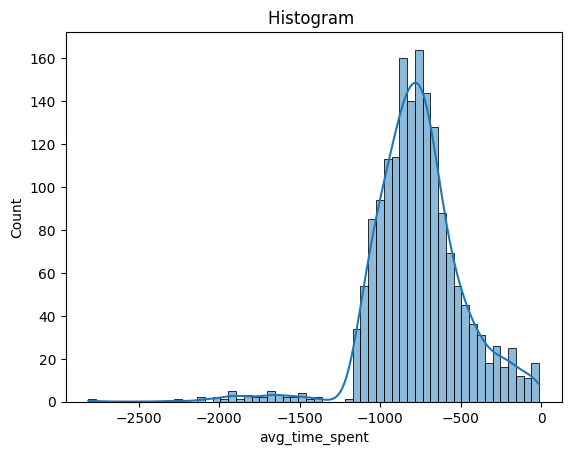

In [27]:


sns.histplot( df.loc[df['avg_time_spent']<0]['avg_time_spent'], kde=True)
plt.xlabel('avg_time_spent')
plt.ylabel('Count')
plt.title('Histogram ')
plt.show()


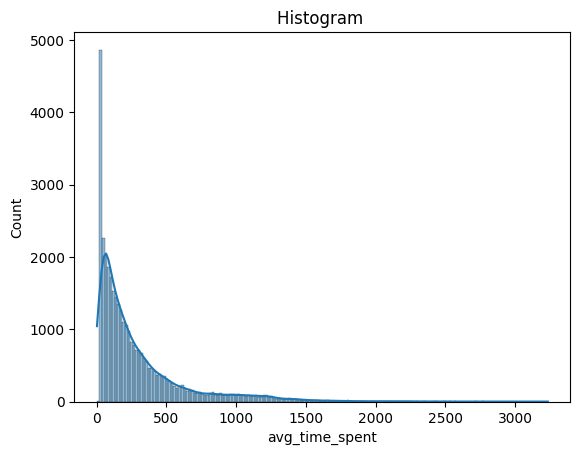

In [28]:


sns.histplot( df.loc[df['avg_time_spent']>=0]['avg_time_spent'], kde=True)
plt.xlabel('avg_time_spent')
plt.ylabel('Count')
plt.title('Histogram ')
plt.show()


Nhận xét:  dữ liệu chứa các giá trị ngoại lệ (outliers) và phân phối dữ liệu lệch.


==> Sử dụng median() thay thế

In [29]:
median_value = df.loc[df['avg_time_spent'] >= 0, 'avg_time_spent'].median()
df['avg_time_spent'] = df['avg_time_spent'].mask(df['avg_time_spent'] < 0, median_value)

In [30]:
df.loc[df['avg_time_spent'] >0 ].describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,12.758552,287.241508,29271.194003,16.477389,686.882199,3.463397
std,15.867412,5.419937,325.101281,19444.806226,7.894634,194.063624,1.409661
min,10.000000,1.000000,1.837399,800.460000,0.009208,-760.661236,-1.000000
25%,23.000000,9.000000,75.620000,14177.540000,11.000000,616.150000,3.000000
50%,37.000000,12.758552,174.180000,27554.485000,16.000000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000


### Xử lý giá trị âm cột 'points_in_wallet' và giá trị NaN 

In [31]:
df.loc[df['points_in_wallet'] < 0].iloc[:,0:12]

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login
67,28,M,Village,Basic Membership,2017-10-29,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:46:58,4.000000
70,59,F,Town,No Membership,2017-06-08,Yes,CID8099,Gift Vouchers/Coupons,Desktop,Fiber_Optic,10:53:03,12.758552
213,42,F,City,Gold Membership,2016-03-28,Yes,xxxxxxxx,Without Offers,Desktop,Wi-Fi,00:30:47,8.000000
340,38,F,NaN,Basic Membership,2015-10-02,No,xxxxxxxx,Without Offers,Desktop,Fiber_Optic,13:24:41,6.000000
625,40,F,City,Premium Membership,2016-09-09,Yes,CID26330,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,23:59:55,12.758552
...,...,...,...,...,...,...,...,...,...,...,...,...
35411,13,M,City,Silver Membership,2017-07-18,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,05:14:17,21.000000
35883,63,M,Town,Basic Membership,2016-06-06,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Wi-Fi,16:01:03,12.758552
35943,27,F,Town,Platinum Membership,2016-09-25,Yes,CID32336,Without Offers,Desktop,Wi-Fi,05:36:34,16.000000
36414,43,M,Town,Platinum Membership,2017-01-03,Yes,CID35437,Gift Vouchers/Coupons,Desktop,Wi-Fi,17:38:05,5.000000


In [32]:
df.loc[df['points_in_wallet'] < 0].iloc[:,11:22]

,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
67,4.000000,457.33,20883.28,14.0,-549.357498,No,Yes,No,Not Applicable,Too many ads,5
70,12.758552,207.52,12556.28,10.0,-44.597633,No,Yes,No,Not Applicable,No reason specified,4
213,8.000000,179.84,39667.91,10.0,-38.084314,No,Yes,No,Not Applicable,Poor Product Quality,3
340,6.000000,176.66,29048.04,21.0,-288.247333,Yes,No,Yes,No Information Available,Poor Product Quality,5
625,12.758552,104.47,87823.92,16.0,-301.998780,Yes,No,No,Not Applicable,Reasonable Price,1
...,...,...,...,...,...,...,...,...,...,...,...
35411,21.000000,32.85,30273.31,7.0,-108.057352,No,Yes,Yes,Solved in Follow-up,Too many ads,3
35883,12.758552,158.85,46377.80,25.0,-99.476870,Yes,No,Yes,No Information Available,Too many ads,5
35943,16.000000,169.58,28162.81,12.0,-43.109270,Yes,No,No,Not Applicable,No reason specified,3
36414,5.000000,40.54,868.01,16.0,-170.497210,Yes,No,No,Not Applicable,No reason specified,3


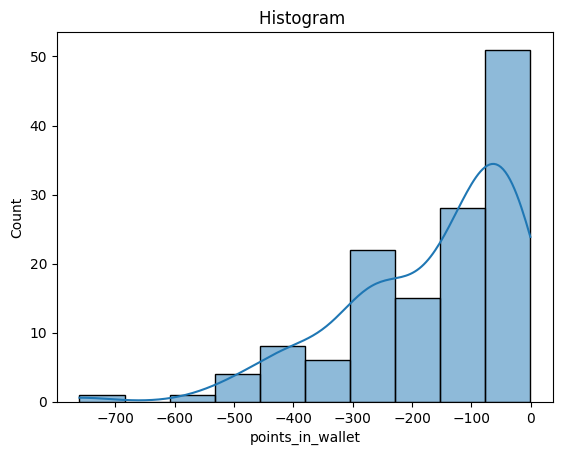

In [33]:

sns.histplot( df.loc[df['points_in_wallet']<0]['points_in_wallet'], kde=True)
plt.xlabel('points_in_wallet')
plt.ylabel('Count')
plt.title('Histogram ')
plt.show()

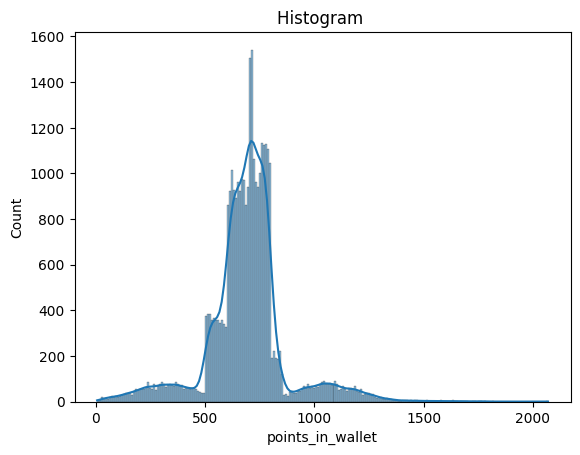

In [34]:

sns.histplot( df.loc[df['points_in_wallet']>=0]['points_in_wallet'], kde=True)
plt.xlabel('points_in_wallet')
plt.ylabel('Count')
plt.title('Histogram ')
plt.show()

In [35]:
median_value = df.loc[df['points_in_wallet'] >= 0, 'points_in_wallet'].median()
df['points_in_wallet'] = df['points_in_wallet'].mask(df['points_in_wallet'] < 0, median_value)
df['points_in_wallet'] = df['points_in_wallet'].fillna(median_value)

In [36]:
df.loc[df['points_in_wallet']>=0].describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,12.758552,287.241508,29271.194003,16.477389,691.118561,3.463397
std,15.867412,5.419937,325.101281,19444.806226,7.894634,177.194251,1.409661
min,10.000000,1.000000,1.837399,800.460000,0.009208,6.432208,-1.000000
25%,23.000000,9.000000,75.620000,14177.540000,11.000000,625.597500,3.000000
50%,37.000000,12.758552,174.180000,27554.485000,16.000000,698.250000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000


In [37]:
nan_counts = df.isna().sum()
print(nan_counts)

age                                0
gender                             0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64


In [38]:
unique_values = df['region_category'].unique()
print(unique_values)

['Village' 'City' 'Town' nan]


In [39]:
df.loc[df['region_category']=='Village']

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,300.63,53005.25,17.000000,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
8,44,M,Village,Silver Membership,2016-12-14,No,xxxxxxxx,Without Offers,Smartphone,Fiber_Optic,...,191.07,18362.31,20.000000,698.250000,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,3
10,25,F,Village,Basic Membership,2016-05-22,Yes,CID19275,Gift Vouchers/Coupons,Both,Wi-Fi,...,570.23,35119.93,8.000000,699.700000,Yes,Yes,No,Not Applicable,Poor Product Quality,5
20,33,M,Village,No Membership,2015-12-03,No,xxxxxxxx,Without Offers,Desktop,Wi-Fi,...,49.86,44289.97,25.000000,703.960000,Yes,No,No,Not Applicable,Poor Customer Service,4
21,30,M,Village,No Membership,2016-07-29,Yes,CID53809,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,30.37,49404.86,23.000000,630.610000,Yes,No,Yes,No Information Available,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36969,54,F,Village,No Membership,2017-05-09,No,xxxxxxxx,Without Offers,Desktop,Mobile_Data,...,50.27,10616.35,5.000000,380.050136,No,Yes,No,Not Applicable,Too many ads,4
36977,64,F,Village,No Membership,2015-10-27,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,159.36,42252.27,10.000000,1251.708596,Yes,No,Yes,Solved,Poor Customer Service,5
36979,42,M,Village,Platinum Membership,2016-09-09,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,92.61,11086.53,27.839927,771.660000,No,Yes,No,Not Applicable,Products always in Stock,2
36985,12,F,Village,Premium Membership,2016-10-25,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Fiber_Optic,...,418.38,56397.21,7.000000,725.890000,Yes,Yes,Yes,Unsolved,Products always in Stock,2


In [40]:
df.loc[df['region_category']=='Town']

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
2,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
6,21,M,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,55.38,8982.50,28.0,756.210000,Yes,No,Yes,Solved in Follow-up,No reason specified,3
9,45,F,Town,No Membership,2016-11-30,No,xxxxxxxx,Gift Vouchers/Coupons,Both,Wi-Fi,...,97.31,19244.16,28.0,706.230000,No,Yes,Yes,No Information Available,Poor Customer Service,4
12,11,M,Town,No Membership,2015-01-31,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Fiber_Optic,...,41.09,44007.18,18.0,608.260000,Yes,No,Yes,Unsolved,Poor Customer Service,4
15,16,F,Town,Basic Membership,2017-07-09,Yes,CID35062,Credit/Debit Card Offers,Smartphone,Fiber_Optic,...,30.14,18792.31,7.0,141.513201,Yes,No,Yes,Unsolved,Too many ads,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36983,45,M,Town,Basic Membership,2016-08-30,Yes,CID45477,Without Offers,Smartphone,Wi-Fi,...,49.33,45358.49,11.0,242.979625,Yes,No,No,Not Applicable,Poor Customer Service,5
36984,51,M,Town,Gold Membership,2016-10-07,No,xxxxxxxx,Without Offers,Desktop,Fiber_Optic,...,312.33,63446.71,2.0,778.700000,No,Yes,No,Not Applicable,Products always in Stock,1
36986,27,M,Town,Platinum Membership,2015-09-07,Yes,CID15800,Credit/Debit Card Offers,Desktop,Mobile_Data,...,135.83,8225.68,16.0,748.570000,Yes,No,No,Not Applicable,No reason specified,3
36988,29,F,Town,Basic Membership,2016-06-27,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,...,174.18,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5


In [41]:
df.loc[df['region_category']=='City']

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
1,32,F,City,Premium Membership,2017-08-28,Yes,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,306.34,12838.38,10.000000,698.250000,Yes,No,Yes,Solved,Quality Customer Care,1
3,37,M,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,53.27,25239.56,6.000000,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,113.13,24483.66,16.000000,663.060000,No,Yes,Yes,Solved,Poor Website,5
5,13,M,City,Gold Membership,2016-01-08,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,433.62,13884.77,24.000000,722.270000,Yes,No,Yes,Unsolved,No reason specified,3
11,60,M,City,Gold Membership,2016-01-13,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,55.53,41672.02,33.024343,798.120000,Yes,No,No,Not Applicable,Too many ads,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36963,49,M,City,Gold Membership,2015-08-20,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,102.02,20486.00,8.000000,659.450000,No,Yes,Yes,Unsolved,No reason specified,4
36964,54,F,City,No Membership,2016-11-07,Yes,CID48865,Credit/Debit Card Offers,Both,Fiber_Optic,...,742.55,5832.81,10.000000,648.280000,Yes,No,Yes,No Information Available,Poor Website,5
36974,27,M,City,Basic Membership,2016-09-14,Yes,CID10431,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,526.13,11833.62,16.000000,640.630000,Yes,Yes,No,Not Applicable,No reason specified,4
36975,34,M,City,Silver Membership,2016-02-16,Yes,CID62597,Credit/Debit Card Offers,Desktop,Mobile_Data,...,33.68,5194.23,13.000000,1011.270354,No,Yes,Yes,Solved in Follow-up,Poor Website,3


In [42]:
df.loc[df['region_category'].isna()]

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
7,42,M,NaN,No Membership,2016-07-12,Yes,CID56614,Credit/Debit Card Offers,Both,Fiber_Optic,...,429.11,44554.82,24.0,568.080000,No,Yes,Yes,Unsolved,Poor Product Quality,5
32,11,F,NaN,Gold Membership,2016-07-28,Yes,CID26584,Without Offers,Desktop,Wi-Fi,...,185.53,60143.68,4.0,836.080000,Yes,No,Yes,Solved in Follow-up,User Friendly Website,1
37,26,M,NaN,No Membership,2017-11-29,Yes,CID39260,Without Offers,Desktop,Wi-Fi,...,215.89,41979.65,9.0,698.250000,No,Yes,No,Not Applicable,Too many ads,5
61,44,F,NaN,No Membership,2016-08-23,Yes,CID35687,Without Offers,Both,Wi-Fi,...,283.49,7603.71,16.0,553.450000,Yes,Yes,Yes,Unsolved,No reason specified,5
64,10,M,NaN,Basic Membership,2015-06-08,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Fiber_Optic,...,31.67,25436.23,16.0,656.670000,No,Yes,No,Not Applicable,Poor Website,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36978,57,M,NaN,Silver Membership,2016-01-10,Yes,CID57663,Without Offers,Both,Wi-Fi,...,58.41,40795.52,14.0,605.820000,No,Yes,No,Not Applicable,Too many ads,4
36980,14,F,NaN,Platinum Membership,2017-04-16,Yes,CID50925,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,389.13,99162.86,6.0,1096.932079,No,Yes,Yes,Solved,Reasonable Price,1
36982,45,F,NaN,Premium Membership,2016-08-31,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,34.93,41558.93,19.0,703.030000,Yes,No,No,Not Applicable,Poor Product Quality,3
36987,46,F,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Wi-Fi,...,174.18,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4


In [43]:
# setting missing values to most occurring values
def fillNan(df, col, value):
    df[col].fillna(value, inplace=True)
fillNan(df, 'region_category', df['region_category'].mode()[0])

df['region_category'].isna().any()

False

In [44]:
# df['region_category'].fillna('other', inplace=True)

# data

In [45]:
df.drop('referral_id', axis=1, inplace=True)

In [46]:
# select numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [47]:
cont_features, cat_features = divideFeatures(df)
# boxplots of numerical features for outlier detection
fig = plt.figure(figsize=(16,16))
for i in range(len(cont_features.columns)):
    fig.add_subplot(3, 3, i+1)
    sns.boxplot(y=cont_features.iloc[:,i])
plt.tight_layout()
plt.show()

C:\Users\pally\AppData\Local\Temp\ipykernel_13124\1310025103.py:4: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  categorical_features = df.select_dtypes(include=[np.object])


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.35 * IQR
    upper_bound = Q3 + 1.35 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

filtered_df = df.copy()
for column in cont_features.columns:
    filtered_df = remove_outliers_iqr(filtered_df, column)
df= filtered_df


In [ ]:
# df.loc[df['avg_time_spent'] > 620, 'avg_time_spent'] = 620
# df.loc[df['points_in_wallet'] > 900, 'points_in_wallet'] = 900
# df.loc[df['points_in_wallet'] < 460, 'points_in_wallet'] = 460

In [ ]:
# sns.pairplot(df)
# plt.show()


In [ ]:
unique_values = df['churn_risk_score'].unique()
print(unique_values)


[2 1 5 3 4]


In [ ]:
from datetime import datetime
def time_to_seconds(time_str):
    time_obj = datetime.strptime(time_str, "%H:%M:%S")
    total_seconds = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    return total_seconds
df["last_visit_time"] = df["last_visit_time"].apply(time_to_seconds).fillna(0).astype(int)


df['joining_date'] = pd.to_datetime(df['joining_date'])
df['days_since_joined'] = df['joining_date'].apply(lambda x:(pd.Timestamp('today') - x).days)
df.drop(['joining_date'], inplace=True, axis=1)

In [ ]:
# df.drop(["last_visit_time", "days_since_joined"], axis=1, inplace=True)

<Axes: >

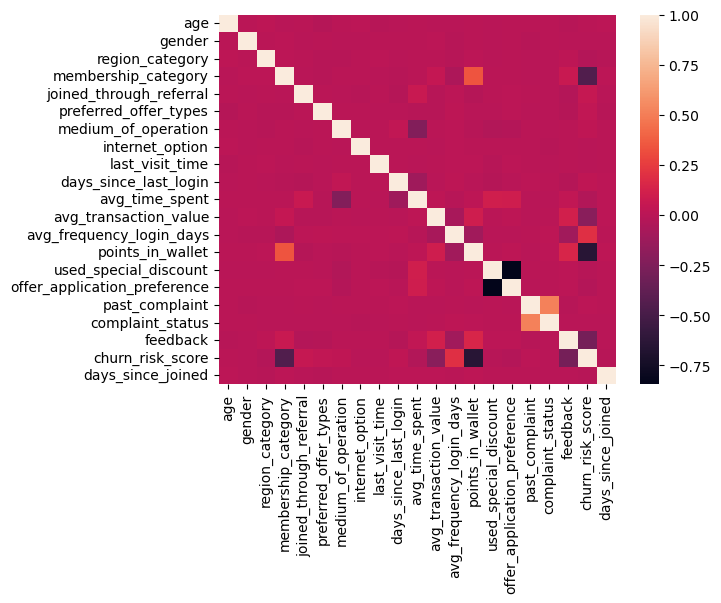

In [ ]:
# Heatmap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Chuyển đổi giới tính thành số
    gender_encoder = LabelEncoder()
    df['gender'] = gender_encoder.fit_transform(df['gender'])

    # Chuyển đổi vùng miền thành số
    region_encoder = LabelEncoder()
    df['region_category'] = region_encoder.fit_transform(df['region_category'])

    # Chuyển đổi loại thành viên thành số
    membership_encoder = LabelEncoder()
    df['membership_category'] = membership_encoder.fit_transform(df['membership_category'])

    # Chuyển đổi loại ưu đãi ưa thích thành số
    offer_encoder = LabelEncoder()
    df['preferred_offer_types'] = offer_encoder.fit_transform(df['preferred_offer_types'])

    # Chuyển đổi phương thức sử dụng thành số
    medium_encoder = LabelEncoder()
    df['medium_of_operation'] = medium_encoder.fit_transform(df['medium_of_operation'])

    # Chuyển đổi lựa chọn kết nối Internet thành số
    internet_encoder = LabelEncoder()
    df['internet_option'] = internet_encoder.fit_transform(df['internet_option'])

    #
    used_special_discount = LabelEncoder()
    df['used_special_discount'] = used_special_discount.fit_transform(df['used_special_discount'])
    
    #
    past_complaint = LabelEncoder()
    df['past_complaint'] = past_complaint.fit_transform(df['past_complaint'])
    
    #
    complaint_status = LabelEncoder()
    df['complaint_status'] = complaint_status.fit_transform(df['complaint_status'])
    
    #
    feedback = LabelEncoder()
    df['feedback'] = feedback.fit_transform(df['feedback'])
    
    #
    offer_application_preference = LabelEncoder()
    df['offer_application_preference'] = feedback.fit_transform(df['offer_application_preference'])
    
    #
    joined_through_referral = LabelEncoder()
    df['joined_through_referral'] = joined_through_referral.fit_transform(df['joined_through_referral'])
    
   
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    feature_names = df.columns.tolist()
    feature_names.remove("churn_risk_score")

    X = df[feature_names].values
    y = df.churn_risk_score.values

    return X, y
X, y = prepare_X_y(df)

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 223
TRAIN_SIZE = 0.3

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Xây dựng pipeline với StandardScaler và mô hình SVM
pipeline = make_pipeline(StandardScaler(), SVC())
# Tạo một dict chứa các giá trị để tinh chỉnh
param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__C': [0.1, 1.0, 10.0],
    'svc__gamma': ['scale', 'auto']
}

# Tạo GridSearchCV để tìm kiếm các tham số tốt nhất
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Huấn luyện mô hình với tìm kiếm lưới
grid_search.fit(trainX, trainY)

# Lấy mô hình tốt nhất từ tìm kiếm lưới
best_model = grid_search.best_estimator_

# Dự đoán nhãn cho dữ liệu kiểm tra
predY = best_model.predict(testX)

# Đánh giá mô hình
accuracy = accuracy_score(testY, predY)
print('Accuracy:', accuracy)
akurasiSVM = accuracy_score(testY, predY)
print('Akurasi model SVM', "{:.2f}".format(akurasiSVM * 100),'%')
print(f"Report Metrics SVM \n {classification_report(testY, predY)}")

print(f"Confuction Matrix SVM ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(testY, predY), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

KeyboardInterrupt: 

Accuracy: 0.6619211346298485
Akurasi model SVM 66.19 %
Report Metrics SVM 
               precision    recall  f1-score   support

           1       0.56      0.55      0.56      1036
           2       0.53      0.32      0.40      1140
           3       0.76      0.82      0.79      5678
           4       0.57      0.65      0.60      5357
           5       0.70      0.60      0.65      5403

    accuracy                           0.66     18614
   macro avg       0.62      0.59      0.60     18614
weighted avg       0.66      0.66      0.66     18614

Confuction Matrix SVM 


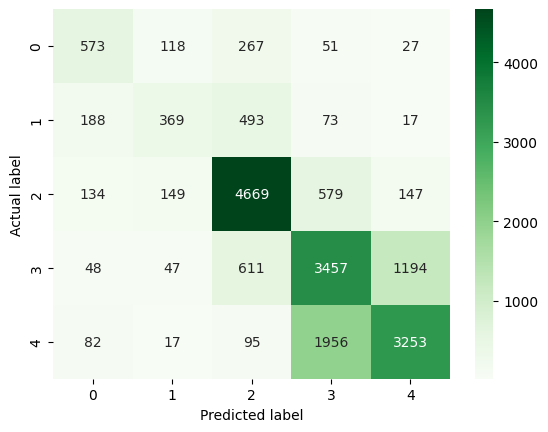

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Chuẩn bị dữ liệu
# X_train, X_test: Dữ liệu đầu vào cho huấn luyện và kiểm tra
# y_train, y_test: Nhãn tương ứng cho huấn luyện và kiểm tra

# Xây dựng pipeline với StandardScaler và mô hình SVM
pipeline = make_pipeline(StandardScaler(), SVC(kernel= 'linear', C=1.0, gamma='scale'))

# Huấn luyện mô hình
pipeline.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu kiểm tra
predY = pipeline.predict(testX)

# Đánh giá mô hình
accuracy = accuracy_score(testY, predY)
print('Accuracy:', accuracy)
akurasiSVM = accuracy_score(testY, predY)
print('Akurasi model SVM', "{:.2f}".format(akurasiSVM * 100),'%')
print(f"Report Metrics SVM \n {classification_report(testY, predY)}")

print(f"Confuction Matrix SVM ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(testY, predY), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()


Akurasi model SVM 85.13 %
Report Metrics SVM 
               precision    recall  f1-score   support

           1       0.83      0.83      0.83      1036
           2       0.85      0.85      0.85      1140
           3       0.95      0.94      0.95      5678
           4       0.77      0.78      0.78      5357
           5       0.83      0.82      0.83      5403

    accuracy                           0.85     18614
   macro avg       0.85      0.85      0.85     18614
weighted avg       0.85      0.85      0.85     18614

Confuction Matrix SVM 


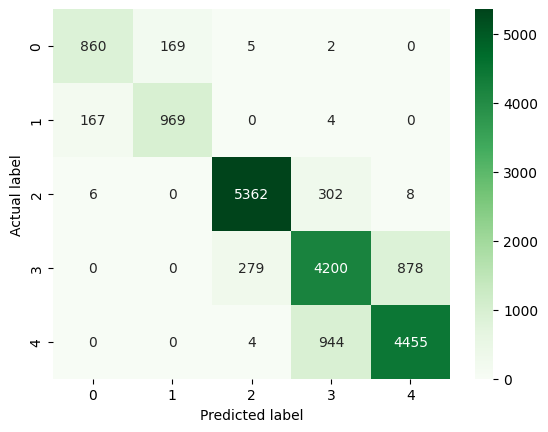

In [ ]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    # model = make_pipeline(DecisionTreeClassifier(random_state=0))
    # # Todo: fit your model with X, y
    # model.fit(X, y)
    dtree = DecisionTreeClassifier(max_depth=15, min_samples_split=10, min_samples_leaf=12)
    dtree.fit(X, y)

    return model

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    # precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    print("precision", precision)
    print("recall", recall)
    print("accuracy", accuracy)
    print("F1", F1)

    # Todo: Only choose one of them as your score for the question 7
    main_score = F1
    return main_score





# Build the decision tree model and train it on the training data
model = build_model(trainX, trainY)

# Use the model to make predictions on the test data
predY = model.predict(testX)

# Calculate model performance using the test data
akurasiSVM = accuracy_score(testY, predY)
print('Akurasi model SVM', "{:.2f}".format(akurasiSVM * 100),'%')
print(f"Report Metrics SVM \n {classification_report(testY, predY)}")

print(f"Confuction Matrix SVM ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(testY, predY), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()
